In [1]:
# importing pandas and the standard python datetime module
import re
import pandas as pd
import numpy as np
import datetime as dt

# age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target

# importing the data from the csv file
raw_heart = pd.read_csv('heart.csv')
raw_heart.target = raw_heart.target.apply(lambda x: x == 1)
raw_heart.exang = raw_heart.exang.apply(lambda x: x == 1)

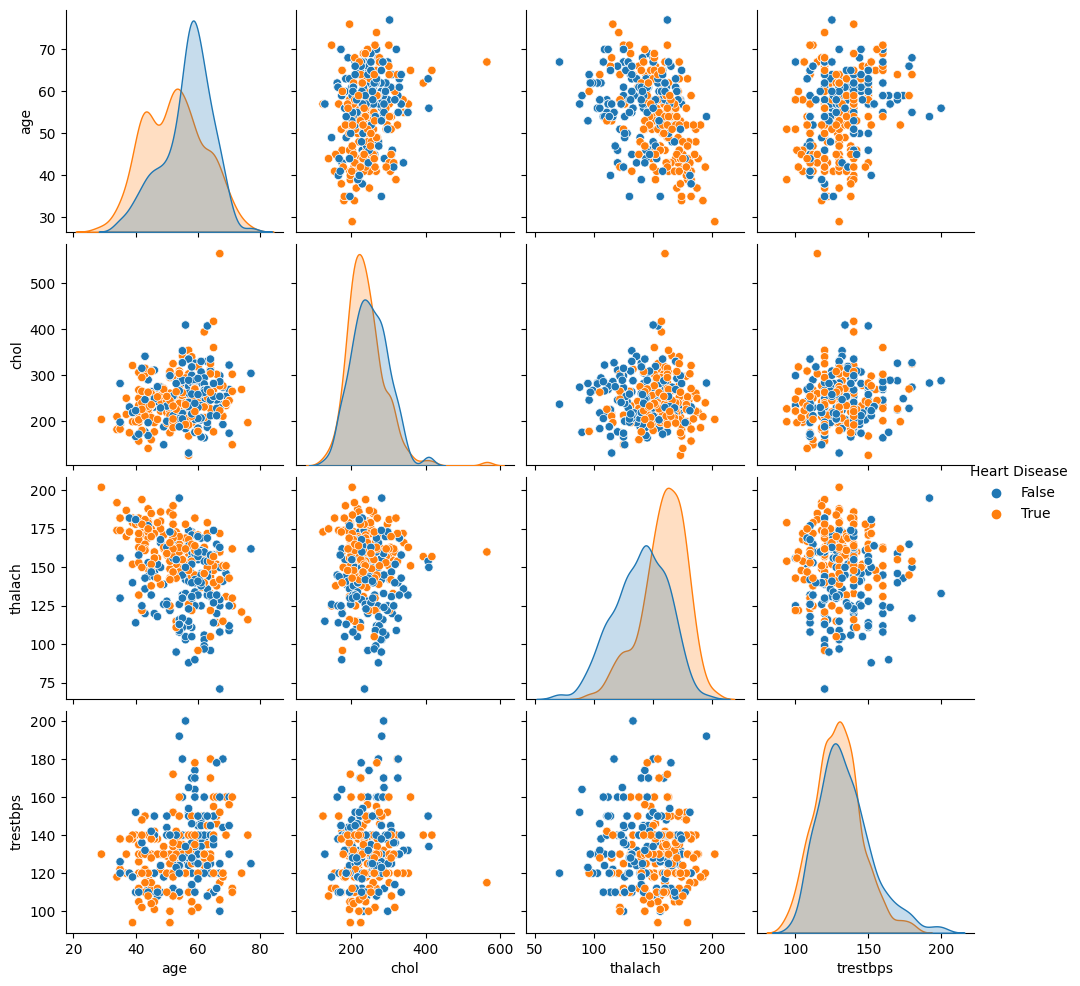

In [2]:
# location plot
import seaborn as sns
import matplotlib.pyplot as plt

fgrid: sns.FacetGrid = sns.pairplot(data=raw_heart, hue='target', vars=[
             'age', 'chol', 'thalach', 'trestbps'])
fgrid.legend.set_title('Heart Disease')

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import pickle
from os.path import exists

model = None
model_file = 'heart_disease_model.model'

# input variables and target columns
X = raw_heart.drop('target', axis=1)
y = raw_heart['target'].to_numpy()

#split data
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.3)

if not exists(model_file):
    # creating the model and training it
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # saving the model
    pickle.dump(model, open(model_file, 'wb'))
else:
    # loading model
    model = pickle.load(open(model_file, 'rb'))


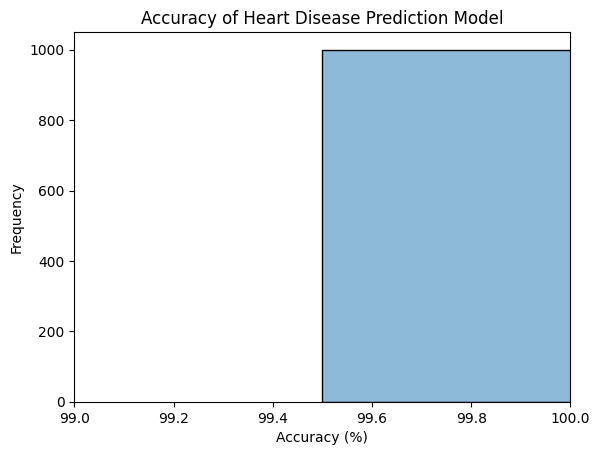

In [13]:
# prediction testing

# include previous code...

from sklearn.metrics import accuracy_score

def predict_and_get_accuracy(model):
    _, X_test, _, y_test = train_test_split(X, y, test_size=0.3)
    return accuracy_score(y_test, model.predict(X_test))

test_count = 1000
accuracy_results = np.ndarray(test_count)
for i in range(test_count):
    # converting to percentage (2 decimal places)
    accuracy_results[i] = round(predict_and_get_accuracy(model) * 10000) / 100

fig, ax = plt.subplots()
# plotting results
sns.histplot(accuracy_results, kde=True)
ax.set_xlim(99, 100)
ax.set_xlabel('Accuracy (%)')
ax.set_ylabel('Frequency')
ax.set_title('Accuracy of Heart Disease Prediction Model')
plt.show()